## Introdução

**Features:**

* `precipitacao total`: quantidade total de chuva acumulada no período, em milímetros (mm).
* `pressao atmos nv estacao`: pressão atmosférica medida ao nível da estação meteorológica, em milibares (mB).
* `pressao atmos max`: maior valor da pressão atmosférica registrado na hora anterior, em milibares (mB).
* `pressao atmos min`: menor valor da pressão atmosférica registrado na hora anterior, em milibares (mB).
* `radiacao`: radiação solar global recebida, em kilojoules por metro quadrado (Kj/m²).
* `temp ar`: temperatura do ar (bulbo seco) no momento da medição, em graus Celsius (°C).
* `temp pronto orvalho`: temperatura do ponto de orvalho (quando o ar fica saturado de vapor d’água), em °C.
* `temp max`: temperatura máxima registrada na hora anterior, em °C.
* `temp min`: temperatura mínima registrada na hora anterior, em °C.
* `temp orvalho max`: valor máximo da temperatura de orvalho registrado na hora anterior, em °C.
* `temp orvalho min`: valor mínimo da temperatura de orvalho registrado na hora anterior, em °C.
* `umidade max`: umidade relativa máxima registrada na hora anterior, em porcentagem (%).
* `umidade min`: umidade relativa mínima registrada na hora anterior, em porcentagem (%).
* `umidade relativa ar`: umidade relativa do ar no momento da medição, em porcentagem (%).
* `vento direcao`: direção do vento no instante da medição, em graus (0–360).
* `vento rajada max`: velocidade da rajada máxima de vento registrada, em metros por segundo (m/s).
* `vento velocidade`: velocidade média do vento no instante da medição, em m/s.
* `dia_do_mes`: número do dia dentro do mês (1 a 31).
* `semana_do_ano`: número da semana dentro do ano (1 a 52).
* `dia_semana_sin`: transformação seno para representar o dia da semana (captura periodicidade sem descontinuidade).
* `dia_semana_cos`: transformação cosseno para representar o dia da semana (complementar ao seno).
* `mes_sin`: transformação seno para representar o mês do ano (captura sazonalidade anual).
* `mes_cos`: transformação cosseno para representar o mês do ano (complementar ao seno).
* `hora_num`: hora do dia em formato numérico (0 a 23).
* `hora_sin`: transformação seno para representar a hora do dia (captura ciclos diários).
* `hora_cos`: transformação cosseno para representar a hora do dia (complementar ao seno).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.objects as so


In [2]:
df = pd.read_csv("../data/INMET_DF_processado.csv")
df.head()

,data,precipitacao total,pressao atmos nv estacao,pressao atmos max,pressao atmos min,radiacao,temp ar,temp pronto orvalho,temp max,temp min,...,vento velocidade,dia_do_mes,semana_do_ano,dia_semana_sin,dia_semana_cos,mes_sin,mes_cos,hora_num,hora_sin,hora_cos
0,2024-01-01,0.0,885.7,885.7,885.3,844.6515,22.0,18.2,22.6,21.8,...,1.5,1,1,0.0,1.0,0.5,0.866025,0,0.000000,1.000000
1,2024-01-01,0.0,886.7,886.7,885.7,844.6515,21.2,18.6,22.0,21.1,...,1.5,1,1,0.0,1.0,0.5,0.866025,1,0.258819,0.965926
2,2024-01-01,0.0,887.1,887.2,886.7,844.6515,20.9,18.8,21.5,20.9,...,1.1,1,1,0.0,1.0,0.5,0.866025,2,0.500000,0.866025
3,2024-01-01,0.0,887.1,887.4,887.1,844.6515,20.9,18.3,21.1,20.8,...,1.5,1,1,0.0,1.0,0.5,0.866025,3,0.707107,0.707107
4,2024-01-01,0.0,886.4,887.1,886.4,844.6515,20.5,18.6,21.0,20.5,...,2.0,1,1,0.0,1.0,0.5,0.866025,4,0.866025,0.500000


In [3]:
lista_features = df.columns.to_list()
colunas_dia_data = lista_features[-9:]

In [5]:
df.describe().drop(columns=colunas_dia_data)

,precipitacao total,pressao atmos nv estacao,pressao atmos max,pressao atmos min,radiacao,temp ar,temp pronto orvalho,temp max,temp min,temp orvalho max,temp orvalho min,umidade max,umidade min,umidade relativa ar,vento direcao,vento rajada max,vento velocidade
count,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000
mean,0.159749,887.879577,888.126282,887.633124,811.341678,21.978241,14.467756,22.722878,21.273284,15.017807,13.940742,70.397944,64.067390,67.270360,147.371216,4.909115,2.087105
std,1.264249,2.406873,2.382213,2.416875,1044.666691,3.934086,5.134531,4.021806,3.830455,5.087790,5.201116,22.628663,23.133801,22.970979,101.454127,2.076237,0.986977
min,0.000000,880.600000,880.700000,880.500000,0.000000,9.500000,-4.200000,10.400000,9.500000,-3.200000,-5.000000,12.000000,10.000000,11.000000,1.000000,0.700000,0.100000
25%,0.000000,886.200000,886.500000,886.000000,45.200000,19.400000,10.400000,19.800000,19.000000,11.000000,10.000000,54.000000,46.000000,50.000000,79.000000,3.300000,1.300000
50%,0.000000,887.800000,888.000000,887.500000,173.061540,21.500000,16.800000,22.200000,20.800000,17.400000,16.100000,75.000000,66.000000,70.000000,108.000000,4.800000,2.000000
75%,0.000000,889.500000,889.700000,889.300000,1526.550000,24.800000,18.600000,25.700000,23.900000,19.100000,18.200000,91.000000,85.000000,88.000000,212.000000,6.300000,2.800000
max,35.200000,895.200000,895.200000,895.100000,4080.400000,35.400000,21.800000,36.100000,34.200000,22.600000,21.300000,99.000000,98.000000,98.000000,360.000000,18.900000,7.500000


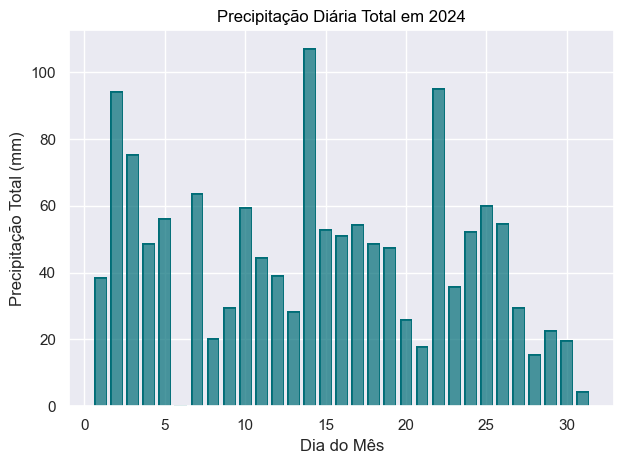

In [39]:
# Agrupar por dia do mês
chuva_diaria = df.groupby('dia_do_mes')['precipitacao total'].sum().reset_index()

# Plot
so.Plot(chuva_diaria['dia_do_mes'],
        chuva_diaria['precipitacao total'],
        ).add(so.Bar(color="#006d77")).label(
                y="Precipitação Total (mm)",
                x="Dia do Mês",
                title="Precipitação Diária Total em 2024").show()